### Data Dogs Group Project
#### Inseo Baek, Steph Law, Jenny Kim

In [130]:
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn import tree #Look at documentation: http://scikit-learn.org/stable/modules/tree.html
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split # Helping you divide your datasets to train/test(validation)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline
fg_width = 20
fg_height = 10
plt.figure(figsize=(fg_width, fg_height))

In [104]:
customer_churn_data = pd.read_csv("../datasets/customer_churn.csv")
customer_churn_data.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [105]:
customer_churn_data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [106]:
customer_churn_data.describe(include=['O'])

,State,Phone,Int'l Plan,VMail Plan,Churn?
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,337-1225,no,no,False.
freq,106,1,3010,2411,2850


In [107]:
list_of_col_to_drop = ['State','Area Code', 'Phone']
customer_churn_data.drop(list_of_col_to_drop, axis=1, inplace=True)
customer_churn_data.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [108]:
customer_churn_data["Churn?"].replace({'True.': 1,'False.':0}, inplace=True)
customer_churn_data["Int'l Plan"].replace({'yes': 1,'no':0}, inplace=True)
customer_churn_data["VMail Plan"].replace({'yes': 1,'no':0}, inplace=True)
customer_churn_data.head()


,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [109]:
customer_churn_data['Total Mins'] = customer_churn_data['Day Mins'] + customer_churn_data['Eve Mins'] + customer_churn_data['Night Mins']
customer_churn_data['Total Charge'] = customer_churn_data['Day Charge'] + customer_churn_data['Eve Charge'] + customer_churn_data['Night Charge']
customer_churn_data['Total Calls'] = customer_churn_data['Day Calls'] + customer_churn_data['Eve Calls'] + customer_churn_data['Night Calls']

In [110]:
churn_customers = customer_churn_data.loc[customer_churn_data['Churn?'] == 1]
no_churn_customers = customer_churn_data.loc[customer_churn_data['Churn?'] == 0]

churn_customers.describe()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,...,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Charge,Total Calls
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,...,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000,483.0,483.000000,483.000000,483.000000
mean,102.664596,0.283644,0.165631,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,...,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814,1.0,624.555901,62.466418,302.296066
std,39.467820,0.451233,0.372135,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,...,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275,0.0,110.830694,13.887371,35.027276
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,...,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000,1.0,311.700000,21.090000,204.000000
25%,76.000000,0.000000,0.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,...,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000,1.0,535.400000,50.190000,278.500000
50%,103.000000,0.000000,0.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,...,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000,1.0,635.800000,63.960000,302.000000
75%,127.000000,1.000000,0.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,...,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000,1.0,714.750000,73.825000,326.500000
max,225.000000,1.000000,1.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,...,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000,1.0,876.900000,92.560000,407.000000


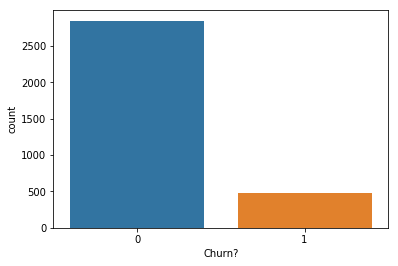

In [111]:


sns.countplot(x="Churn?", data=customer_churn_data)

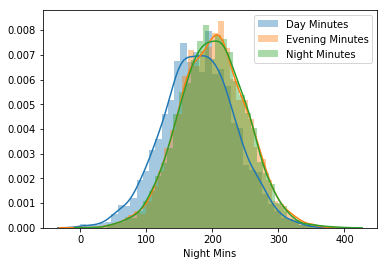

In [112]:
sns.distplot(customer_churn_data['Day Mins'], label='Day Minutes')
sns.distplot(customer_churn_data['Eve Mins'], label='Evening Minutes')
sns.distplot(customer_churn_data['Night Mins'], label='Night Minutes')

plt.legend()
plt.show()

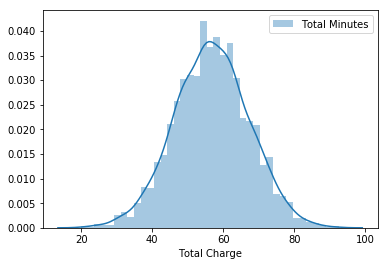

In [113]:
sns.distplot(customer_churn_data['Total Charge'], label='Total Minutes')
plt.legend()
plt.show()

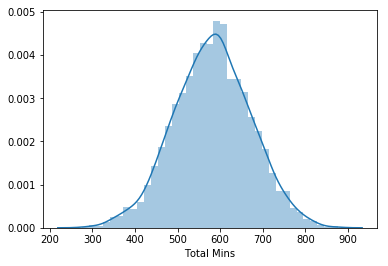

In [114]:
sns.distplot(customer_churn_data['Total Mins'], label='Total Charge')

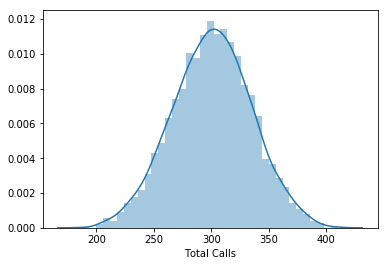

In [115]:
sns.distplot(customer_churn_data['Total Calls'], label='Total Calls')

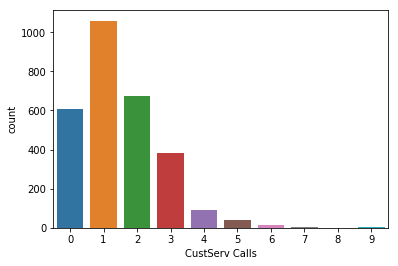

In [116]:
sns.countplot(x='CustServ Calls', data=no_churn_customers)
sns.countplot(x='CustServ Calls', data=churn_customers)
plt.show()

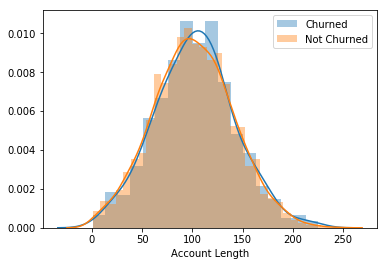

In [117]:
sns.distplot(churn_customers['Account Length'], label='Churned')
sns.distplot(no_churn_customers['Account Length'], label='Not Churned')
plt.legend()
plt.show()

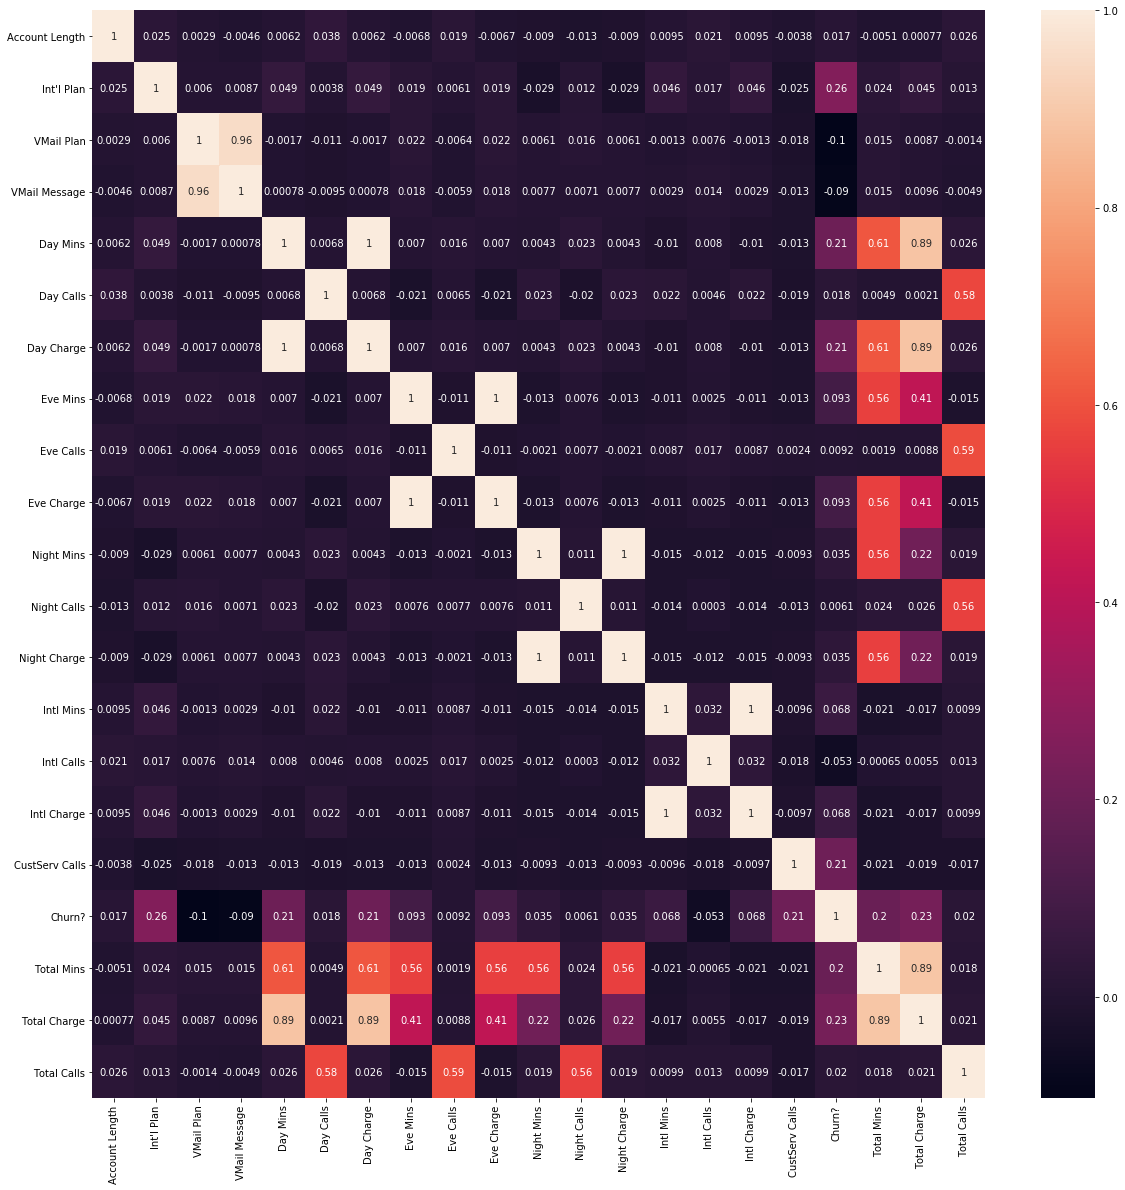

In [118]:
plt.figure(figsize=(20, 20))
sns.heatmap(customer_churn_data.corr(), annot=True)

## Predictive Modelling (Classification)

In [119]:
X = customer_churn_data.drop('Churn?', axis=1)
y = customer_churn_data['Churn?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [120]:
# Naive Bayes

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [121]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [122]:
clf.score(X_test, y_test)

0.8776978417266187

In [124]:
# Decision Tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
tree_model.predict(X_test)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [126]:
tree_model.score(X_test, y_test)

0.9460431654676259

In [134]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [135]:
forest_model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [136]:
forest_model.score(X_test, y_test)

0.9616306954436451